### Regularized Logistic Regression


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
data = np.loadtxt("ex2data2.txt", delimiter = ",", dtype = float)

In [94]:
data

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [95]:
type(data[0][0])

numpy.float64

In [96]:
data.shape

(118, 3)

In [97]:
X = data[:, 0:2]
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [98]:
X
print(X.shape)


(118, 2)


In [99]:
y = data[:, 2]

In [100]:
y.shape


(118,)

***Plotting Data***  
Plot shows us the data cannot have a clean / straight decision boundary line and is likely prone to be overfit if we use straightforward logistic regression

In [101]:
def plotData(inputData):
    x0 = inputData[inputData[:, 2] == 0]
    x1 = inputData[inputData[:, 2] == 1]
    yes = plt.scatter(x0[:,0], x0[:, 1], marker = 'o', color = 'C1')
    no = plt.scatter(x1[:,0], x1[:, 1], marker = 'x', color = 'C0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend((yes, no), ('y = 0', 'y = 1'), loc = 'upper right')

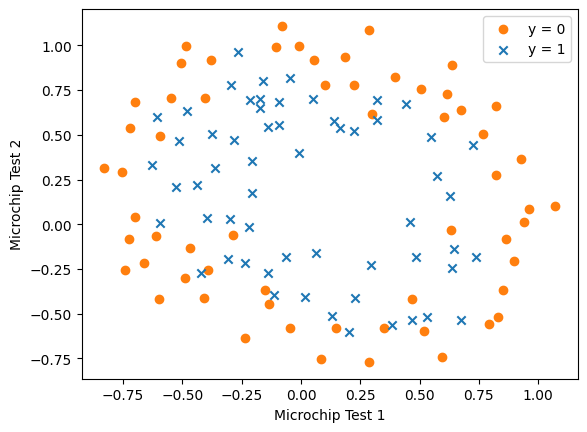

In [102]:
plotData(data)

***Feature mapping***

In [103]:
def mapFeature(X1, X2):
    degrees = 6
    X1 = np.reshape(X1, (X1.size, 1))
    X2 = np.reshape(X2, (X2.size, 1))
    #print(X1.shape)
    #print(X2.shape)
    output = np.ones((X1.size, 1))
    #print(output)
    for i in range(1, degrees + 1):
        for j in range(i + 1):
            new_col = (X1**(i - j)) *(X2**j)
            output = np.append(output, new_col, axis=1)
    #print(output.shape)        
    return output

    
    

In [104]:

newX = mapFeature(X[:,0], X[:,1])
newX
print(np.shape(newX))

(118, 28)


***Regularized Logistic Regression***

In [105]:
def costFunctionReg(theta, X, y, lam):
    m = y.shape[0]
    grad = np.zeros(theta.shape)
    z = np.dot(X, theta)
    hyp = 1/(1 + np.exp(-z))
    cost = ((-np.dot(y, np.log(hyp))-np.dot((1-y),np.log(1-hyp)))/m) + (lam/(2*m))*np.dot(theta, theta)
    grad = np.dot((hyp - y), X) / m + (lam / m) * theta

    return (cost, grad)
    

In [106]:
initial_theta = np.zeros((newX.shape[1], ))
lam = 1

initial_theta.shape



(28,)

In [107]:
[cost, grad] = costFunctionReg(initial_theta, newX, y, lam)

In [108]:
cost

0.6931471805599454

In [109]:
grad

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

***Optimize***  
Similar to last time, convert fminunc from Octave in Python to optimize regression

In [142]:
from scipy.optimize import minimize #use scipy.optimize.minimize function, closest thing to fminunc
result = minimize(costFunctionReg, initial_theta, args = (newX,y, lam), jac = True, method = 'BFGS', options = {'gtol': 1e-05, 'disp': True}) 
#similar to last time but with current variables, add lam as an argument too
#gtol is gradient tolerance, and is used to determine when an optimization algorithm should terminate by setting a threshold for the gradient's norm (i.e., the measure of the rate of change of the function at the current point). If the norm of the gradient is below this threshold, the algorithm assumes that it is close enough to a minimum (since a gradient of zero indicates a local minimum for smooth functions) and stops iterating.

Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47


In [111]:
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.5351602589479554
        x: [ 1.142e+00  6.016e-01 ... -1.380e-01 -9.319e-01]
      nit: 46
      jac: [ 6.316e-07  3.019e-06 ...  3.751e-08 -7.014e-07]
 hess_inv: [[ 9.281e+00  3.685e-01 ...  1.367e-01 -5.482e-01]
            [ 3.685e-01  1.271e+01 ... -3.098e-01 -1.459e+00]
            ...
            [ 1.367e-01 -3.098e-01 ...  3.258e+00  3.252e+00]
            [-5.482e-01 -1.459e+00 ...  3.252e+00  2.444e+01]]
     nfev: 47
     njev: 47


In [112]:
theta = result.x
cost = result.fun
(theta, cost)

(array([ 1.14216777,  0.60159663,  1.16719545, -1.87133829, -0.91585491,
        -1.27009709,  0.12635743, -0.36845898, -0.34493717, -0.17359465,
        -1.42386126, -0.04896996, -0.60654119, -0.26932569, -1.16298464,
        -0.24354149, -0.20689069, -0.0433884 , -0.28027298, -0.28676043,
        -0.46905353, -1.03650746,  0.02900085, -0.29266121,  0.01716382,
        -0.32900567, -0.13798774, -0.93193359]),
 0.5351602589479554)

***Compare predictions and true values***  
Let's calculate the predictions using the result and see how accurate they are compared to our true y values  
We'll make anything over 0.65 in our hypothesis as 1  
Then subtract those from the true y array to create an array where 0 means it was correct and anything else means incorrect  
Check how many were correct or not

In [113]:
z = np.dot(newX, theta)
h = 1 / (1 + np.exp(-z))
h

array([0.68663198, 0.70640447, 0.689426  , 0.71636954, 0.63906188,
       0.60728381, 0.64791756, 0.61051084, 0.61282075, 0.56202675,
       0.52099295, 0.50626644, 0.56537929, 0.4691064 , 0.61605727,
       0.69935759, 0.76084741, 0.55403125, 0.68979785, 0.61755513,
       0.51785317, 0.52200034, 0.47545411, 0.49998281, 0.58182129,
       0.498847  , 0.52235954, 0.39127374, 0.76615247, 0.5844632 ,
       0.24582918, 0.57890982, 0.72314215, 0.75187414, 0.72340799,
       0.69320087, 0.63172011, 0.69562009, 0.72263395, 0.63238289,
       0.70614332, 0.67781592, 0.58671826, 0.72393756, 0.62806278,
       0.66257921, 0.4139552 , 0.75529373, 0.55133386, 0.60665053,
       0.7514089 , 0.79499737, 0.76810902, 0.77321833, 0.75515111,
       0.67130971, 0.70936798, 0.64013037, 0.23883808, 0.53609156,
       0.68459314, 0.36372969, 0.28586138, 0.46735313, 0.30479061,
       0.10698896, 0.31045482, 0.10231707, 0.13845258, 0.26842733,
       0.19452998, 0.23630845, 0.21209755, 0.23861456, 0.27780

In [114]:
h[h >= 0.65] = 1
h[h < 0.65] = 0
h

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
differences = y - h
differences

array([ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [116]:
correct = np.sum(differences == 0)
correct 

84

In [117]:
incorrect = np.sum(differences ==1) + np.sum(differences == -1)
incorrect

34

In [118]:
#calculate true positives
tp = np.count_nonzero(y == 1) - np.count_nonzero(differences == 1)

In [119]:
#calculate the true negatives
tn = np.count_nonzero(differences == 0) - tp

In [120]:
#calculate false positives
fp = np.count_nonzero(differences == -1)

In [121]:
#calculate false negatives
fn = np.count_nonzero(differences == 1)

In [122]:
print('true positives: ', tp)
print('true negatives: ', tn)
print('false positives: ', fp)
print('false negatives: ', fn)

true positives:  26
true negatives:  58
false positives:  2
false negatives:  32


In [123]:
#plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


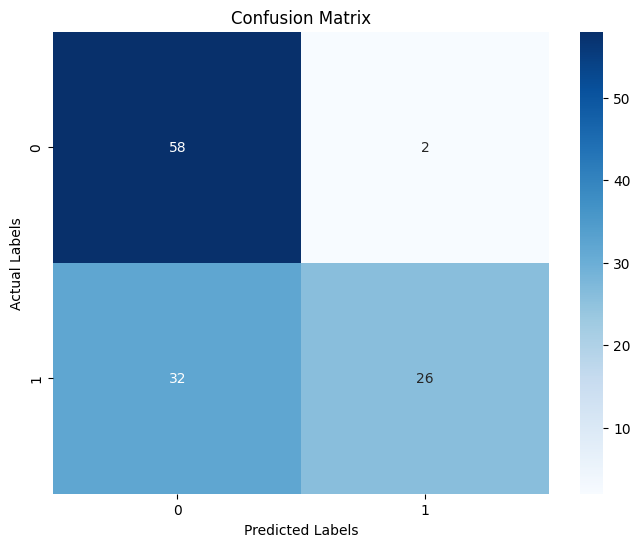

In [124]:
cm = confusion_matrix(y, h)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

***Calculate metrics like accuracy, precision, recall***  
Accuracy: percent of values that are correctly classified  
$\frac {tp + tn} {tp + fp + fn + fn}$  
Precision: percent of correctly predicted cases that are actually positive  
$\frac {tp}{fp + tp}$  
Recall: how many actual positives we predicted correctly with our model  
$ \frac {tp} {tp + fn} $  
F1-score:  
$ \frac {2}{\frac{1}{recall} + \frac{1}{precision}} $

In [125]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (fp + tp)
recall = tp / (tp + fn)
f1_score = 2 / ((1/recall) + (1/precision))
print('acurracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1 score: ', f1_score)

acurracy:  0.711864406779661
precision:  0.9285714285714286
recall:  0.4482758620689655
f1 score:  0.6046511627906977


***Plot Decision Boundary***

In [136]:
def plotDecisionBoundary(theta, inputData):
    plotData(inputData)
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros(shape = (len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = mapFeature(u[i], v[j]).dot(theta)
    plt.contour(u, v, z, 0)
    plt.show()


    
    

/tmp/ipykernel_80/1405651619.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = mapFeature(u[i], v[j]).dot(theta)


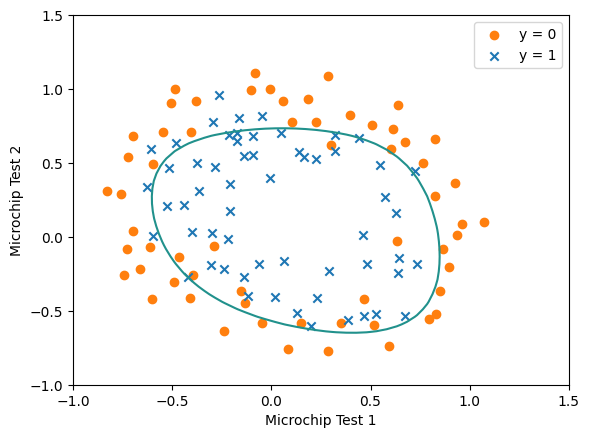

In [137]:
plotDecisionBoundary(theta, data)

***Varying regularization parameter***  
Vary lambda value to see how it changes decision boundary

In [139]:
lam2 = 100
[cost2, grad2] = costFunctionReg(initial_theta, newX, y, lam2)

(0.6931471805599454,
 array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
        1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
        8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
        1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
        4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
        3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
        4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02]))

In [145]:
result2 = minimize(costFunctionReg, initial_theta, args = (newX,y, lam2), jac = True, method = 'BFGS', options = {'gtol': 1e-05, 'disp': True}) 
theta2 = result2.x


Optimization terminated successfully.
         Current function value: 0.686527
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5


/tmp/ipykernel_80/1405651619.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = mapFeature(u[i], v[j]).dot(theta)


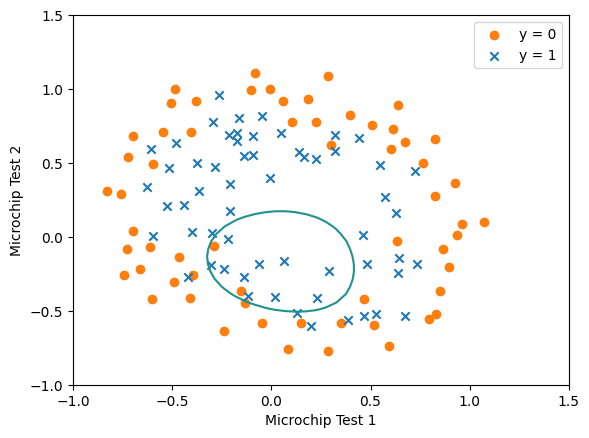

In [146]:
plotDecisionBoundary(theta2, data)

In [147]:
lam3 = 0 
[cost3, grad3] = costFunctionReg(initial_theta, newX, y, lam3)

In [148]:
result3 = minimize(costFunctionReg, initial_theta, args = (newX,y, lam3), jac = True, method = 'BFGS', options = {'gtol': 1e-05, 'disp': True}) 
theta3 = result3.x

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


/tmp/ipykernel_80/1405651619.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = mapFeature(u[i], v[j]).dot(theta)


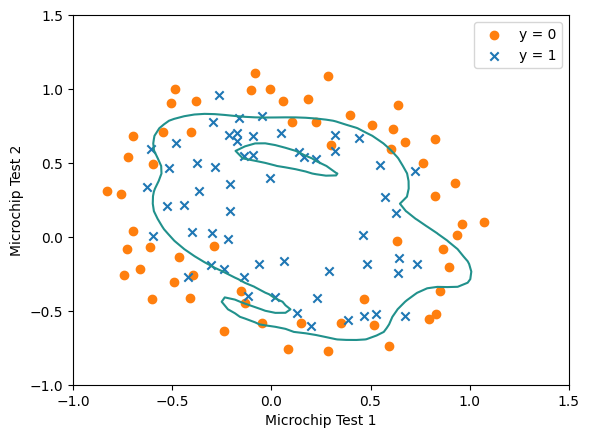

In [149]:
plotDecisionBoundary(theta3, data)

Lower lambda value overfits the data  
Higher lambda value underfits the data